In [139]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [140]:
import tensorflow as tf

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

## 1.讀入數據集 FMNIST

In [142]:
from tensorflow.keras.datasets import fashion_mnist

In [143]:
print(fashion_mnist)

<module 'tensorflow._api.v1.keras.datasets.fashion_mnist' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\tensorflow\\_api\\v1\\keras\\datasets\\fashion_mnist\\__init__.py'>


In [144]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [145]:
#shape
print(x_train.shape) #60000張，每張的像素都是28x28
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [146]:
x_train[0] #用指定編碼，找出資料集

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [147]:
y_train[1996] #圖片正確答案

1

## 2.欣賞數據集內容

In [148]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 為何這樣就可以改類別??

This is Trouser


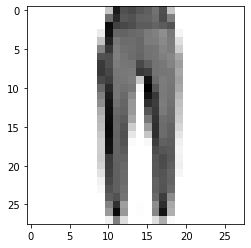

In [149]:
n = 1996
print('This is', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys')

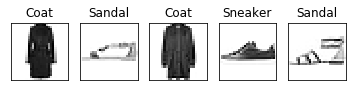

In [150]:
# replace
# 60000個取5個，取後不放回
# replace=True 取後放回
random_pick = np.random.choice(60000, 5, replace=False) #取後不放回

for i in range(5):
    n = random_pick[i]
    ax = plt.subplot(151+i) #一列5行，從左至右為151, 152, 153..., 155
    ax.set_xticks([]) #橫坐標要是空的
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=12)
    plt.imshow(x_train[n], cmap='Greys')

In [151]:
random_pick

array([ 3608, 47467, 29806,   632, 23532])

## 前處理

In [152]:
class_nums = len(class_names)
print(class_nums)

10


In [153]:
# parameters
class_nums = len(class_names)

# flattern and normalize
x_train = x_train.reshape(60000, 28, 28, 1) / 255.
x_test = x_test.reshape(10000, 28, 28, 1) / 255.

In [154]:
# # 對y_data做 one-hot
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, class_nums)
y_test = to_categorical(y_test, class_nums)

In [155]:
x_train.shape

(60000, 28, 28, 1)

## Model

* CNN model
    * optimizer
    * initializer
    * early-stop
    * maybe data augumentation(數據擴充) or transferring learning(轉移學習)??

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop

### 2層卷積層+2層池化層
* 過濾器數量:16, 32個
* 過濾器大小: 3x3
* 填充(padding)方法使用: same
* 激活函數: relu, sigmoid

## 池化層
* MaxPooling: 池化大小分別為6x6, 3x3

In [177]:
# 打開空白函數學習機
model = Sequential() 

model.add(Conv2D(16, (6,6), padding = 'same', input_shape = (28,28,1), activation = 'relu')) 
# 'same': 輸入的維度是多少，無論filter的大小，輸出的維度就是多少
model.add(MaxPooling2D(pool_size = (4,4)))
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())

In [178]:
model.add(Dense(35, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [179]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 28, 28, 16)        592       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 35)                10115     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                360       
Total para

In [180]:
# 打開空白函數學習機
model_2 = Sequential() 

model_2.add(Conv2D(16, (6,6), padding = 'same', input_shape = (28,28,1), activation = 'sigmoid')) 
# 'same': 輸入的維度是多少，無論filter的大小，輸出的維度就是多少
model_2.add(MaxPooling2D(pool_size = (4,4)))
model_2.add(Conv2D(32, (3,3), padding = 'same', activation = 'sigmoid'))
model_2.add(MaxPooling2D(pool_size = (2,2)))

In [181]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 28, 28, 16)        592       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 3, 3, 32)          0         
Total params: 5,232
Trainable params: 5,232
Non-trainable params: 0
_________________________________________________________________


## 組裝神經網路
* 損失函數使用mae
* 優化器使用SGD(lr=0.3)

In [193]:
model.compile(loss='mse',optimizer=SGD(lr=0.3),metrics=['accuracy'])

In [194]:
# 防止過度擬合
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2, verbose = 0, mode = 'auto') 
# patience = 2: 當模型不再進步時，還再多訓練2個epochs

## 訓練

In [183]:
history = model.fit(x_train, y_train, batch_size=500, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 37s 618us/sample - loss: 0.0874 - acc: 0.2609
Epoch 2/20
60000/60000 [==============================] - 23s 386us/sample - loss: 0.0717 - acc: 0.5075
Epoch 3/20
60000/60000 [==============================] - 23s 382us/sample - loss: 0.0478 - acc: 0.6542
Epoch 4/20
60000/60000 [==============================] - 23s 381us/sample - loss: 0.0409 - acc: 0.6960 - loss: 0.0410 - acc: 
Epoch 5/20
60000/60000 [==============================] - 22s 364us/sample - loss: 0.0381 - acc: 0.7190
Epoch 6/20
60000/60000 [==============================] - 22s 364us/sample - loss: 0.0359 - acc: 0.7355
Epoch 7/20
60000/60000 [==============================] - 22s 368us/sample - loss: 0.0343 - acc: 0.7507
Epoch 8/20
60000/60000 [==============================] - 23s 381us/sample - loss: 0.0335 - acc: 0.7567
Epoch 9/20
60000/60000 [==============================] - 21s 357us/sample - loss: 0.0322 - acc: 0.7696
Epoch 10/20
60000/60000 [================

In [195]:
history_2 = model.fit(x_train, y_train, batch_size = 500, epochs = 10, validation_split = 0.3, callbacks = [early_stopping])

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 43s 1ms/sample - loss: 0.0255 - acc: 0.8237 - val_loss: 0.0264 - val_acc: 0.8178
Epoch 2/10
42000/42000 [==============================] - 21s 488us/sample - loss: 0.0252 - acc: 0.8264 - val_loss: 0.0246 - val_acc: 0.8327
Epoch 3/10
42000/42000 [==============================] - 20s 466us/sample - loss: 0.0251 - acc: 0.8269 - val_loss: 0.0252 - val_acc: 0.8273
Epoch 4/10
42000/42000 [==============================] - 19s 459us/sample - loss: 0.0248 - acc: 0.8288 - val_loss: 0.0283 - val_acc: 0.8016


## 訓練成果　

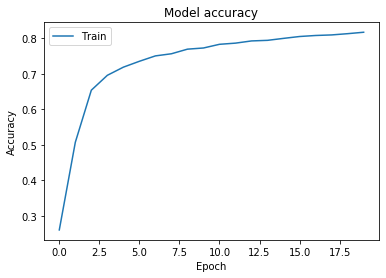

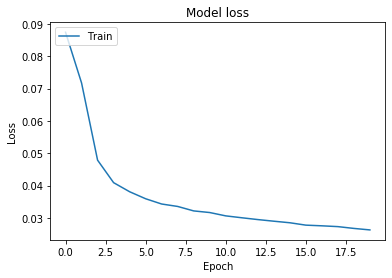

In [185]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [190]:
def my_predict(n):
    print('The predition of CNN is', class_names[result[n]])
    print('The answer is', class_names[np.argmax(y_test[n])])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap = 'Greys')

In [199]:
#model.save('myCNNmodel_0414.h5')